# Azure Multimodal Inference Traces

The trace description can be found [here](../AzureLMMInferenceDataset2025.md).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_data = pd.read_csv('../data/AzureLMMInferenceTrace_multimodal.csv')

In [3]:
df_data

,TIMESTAMP,NumImages,ContextTokens,GeneratedTokens
0,2024-10-15T12:00:00.269Z,0,770,491
1,2024-10-15T12:00:05.819Z,1,949,126
2,2024-10-15T12:00:06.513Z,1,964,79
3,2024-10-15T12:00:07.332Z,0,78,5
4,2024-10-15T12:00:07.566Z,1,1724,28
...,...,...,...,...
999995,2024-10-22T11:59:59.539Z,16,4564,137
999996,2024-10-22T11:59:59.713Z,1,1133,64
999997,2024-10-22T11:59:59.831Z,1,664,326
999998,2024-10-22T11:59:59.962Z,1,1172,76


## Number of Images Distribution

In [4]:
def get_cdf(df, field):
    vals = sorted(df[field].values)
    invs = 100.0 * np.arange(0, len(df)) / len(df)
    return vals, invs

In [5]:
def plt_images(df, field="NumImages", title="Number of Images"):
    df_images, df_inv = get_cdf(df, field)
    plt.plot(df_images, df_inv)
    plt.title(title)
    plt.ylabel("CDF")
    plt.xlabel("Number of Images")
    plt.xscale('log')
    plt.xlim(0)
    plt.grid()
    plt.show()

/tmp/ipykernel_192327/760571481.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0)


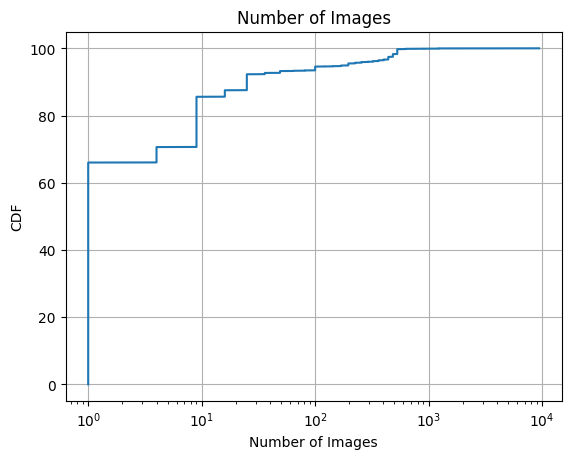

In [6]:
plt_images(df_data[df_data['NumImages'] > 0])

## Token Distributions

In [7]:
def plt_tokens(df, field="ContextTokens", title="Input Tokens"):
    df_img = df[df['NumImages']>0]
    df_tokens, df_inv = get_cdf(df_img, field)
    plt.plot(df_tokens, df_inv, label='Image Requests')
    df_text = df[df['NumImages']==0]
    df_tokens, df_inv = get_cdf(df_text, field)
    plt.plot(df_tokens, df_inv, label='Text Requests')
    plt.legend()
    plt.title(title)
    plt.ylabel("CDF")
    plt.xlabel("Number of Tokens")
    plt.xscale('log')
    plt.grid()
    plt.show()

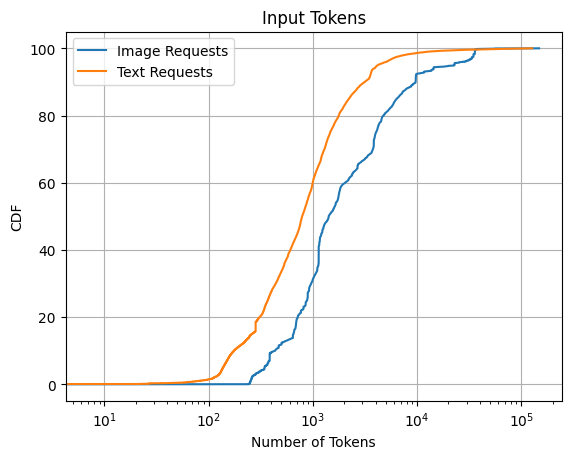

In [8]:
plt_tokens(df_data)

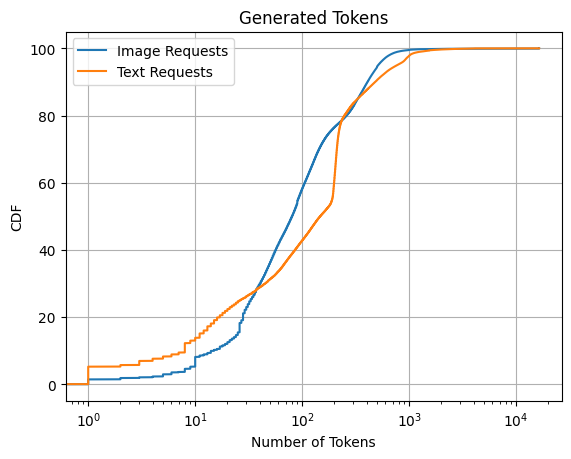

In [9]:
plt_tokens(df_data, field="GeneratedTokens", title="Generated Tokens")

## Time Series

In [10]:
def plt_timeseries_time(df, figsize=(15, 5), field="NumImages", label="Number of Images per Minute"):
    df_copy = df.copy()
    
    # Convert TIMESTAMP to datetime if it's not already
    if df_copy["TIMESTAMP"].dtype == object:
        df_copy["TIMESTAMP"] = pd.to_datetime(df_copy["TIMESTAMP"])
    
    # image requests
    df_img = df_copy[df_copy['NumImages']>0]
    df_img["Time"] = df_img["TIMESTAMP"].dt.round(freq="min")
    if field == 'count':
        img_series = df_img.groupby("Time").count()["TIMESTAMP"]
    else:
        img_series = df_img[['Time', field]].groupby("Time").sum()[field]

    # text requests
    df_text = df_copy[df_copy['NumImages']==0]
    df_text["Time"] = df_text["TIMESTAMP"].dt.round(freq="min")
    if field == 'count':
        text_series = df_text.groupby("Time").count()["TIMESTAMP"]
    else:
        text_series = df_text[['Time', field]].groupby("Time").sum()[field]

    # Plot both series on the same figure
    plt.figure(figsize=figsize)
    img_series.plot(grid=True, label='Image Requests')
    text_series.plot(grid=True, label='Text Requests')
    
    plt.ylabel(label)
    plt.legend()
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_192327/1708064431.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_img["Time"] = df_img["TIMESTAMP"].dt.round(freq="min")
/tmp/ipykernel_192327/1708064431.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text["Time"] = df_text["TIMESTAMP"].dt.round(freq="min")


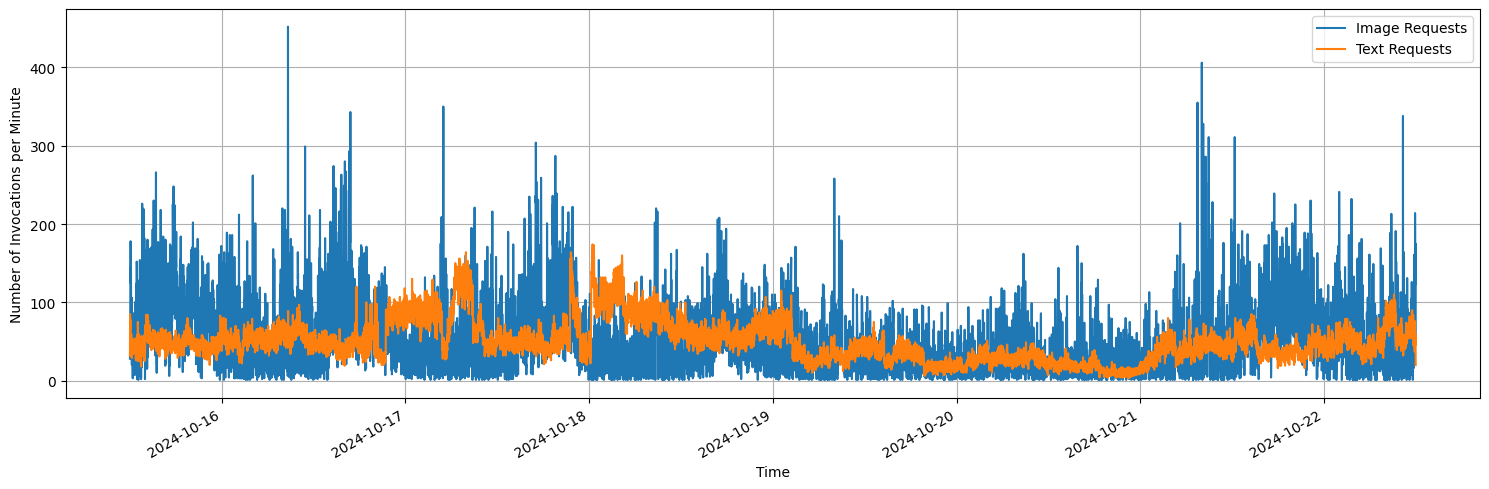

In [11]:
plt_timeseries_time(df_data, field='count', label="Number of Invocations per Minute")

/tmp/ipykernel_192327/1708064431.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_img["Time"] = df_img["TIMESTAMP"].dt.round(freq="min")
/tmp/ipykernel_192327/1708064431.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text["Time"] = df_text["TIMESTAMP"].dt.round(freq="min")


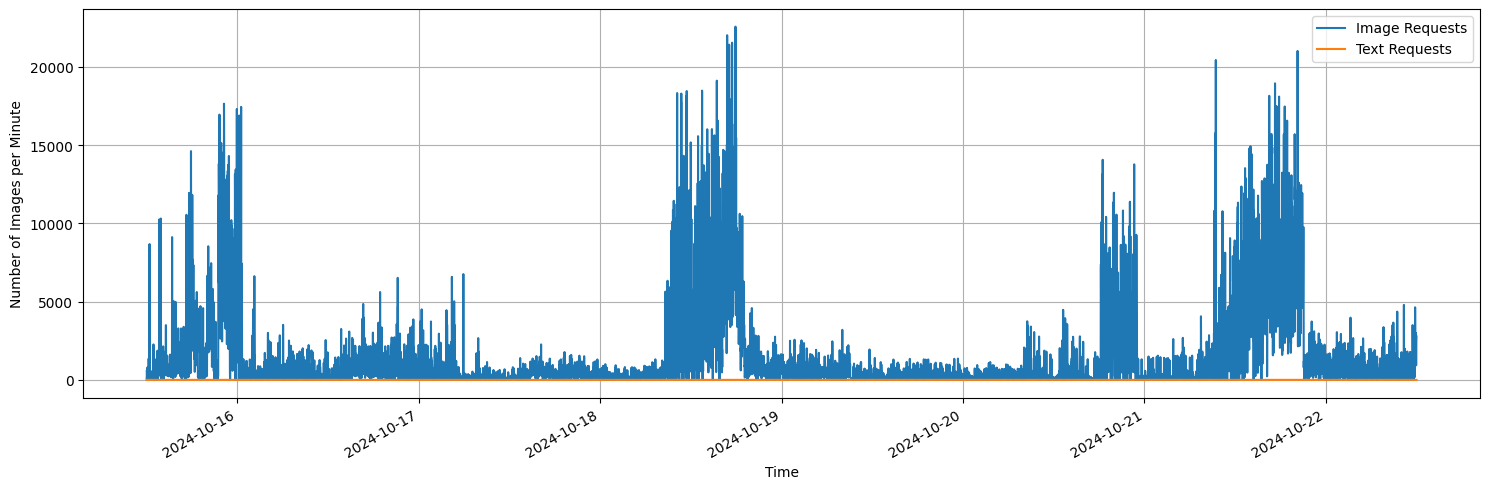

In [12]:
plt_timeseries_time(df_data, field='NumImages', label="Number of Images per Minute")

/tmp/ipykernel_192327/1708064431.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_img["Time"] = df_img["TIMESTAMP"].dt.round(freq="min")
/tmp/ipykernel_192327/1708064431.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text["Time"] = df_text["TIMESTAMP"].dt.round(freq="min")


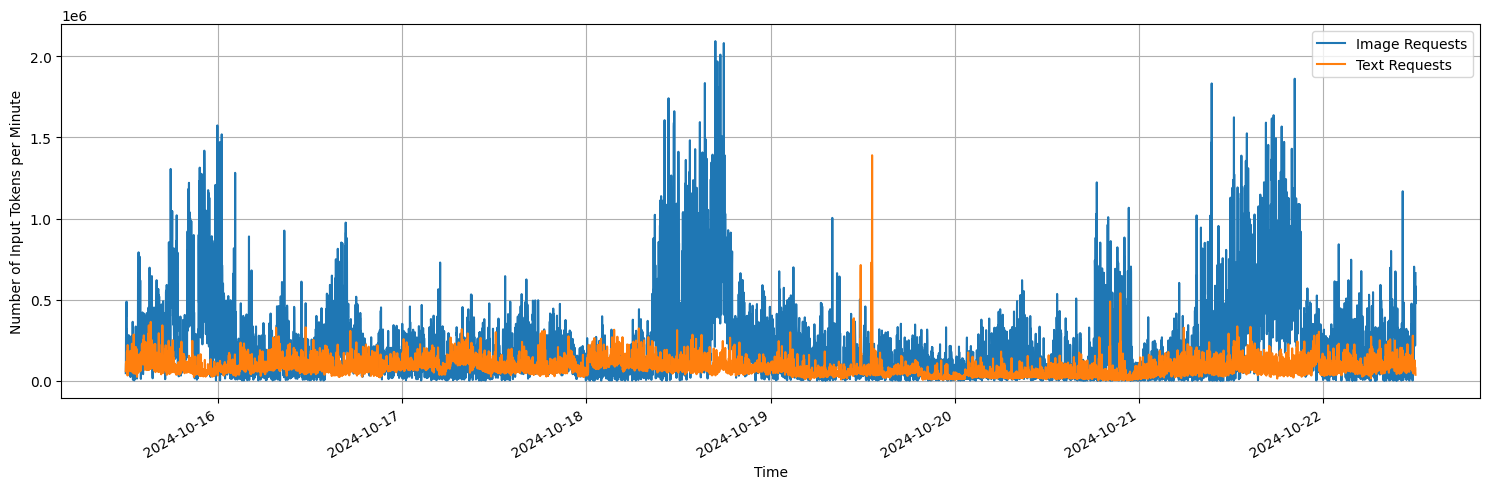

In [13]:
plt_timeseries_time(df_data, field='ContextTokens', label="Number of Input Tokens per Minute")

/tmp/ipykernel_192327/1708064431.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_img["Time"] = df_img["TIMESTAMP"].dt.round(freq="min")
/tmp/ipykernel_192327/1708064431.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text["Time"] = df_text["TIMESTAMP"].dt.round(freq="min")


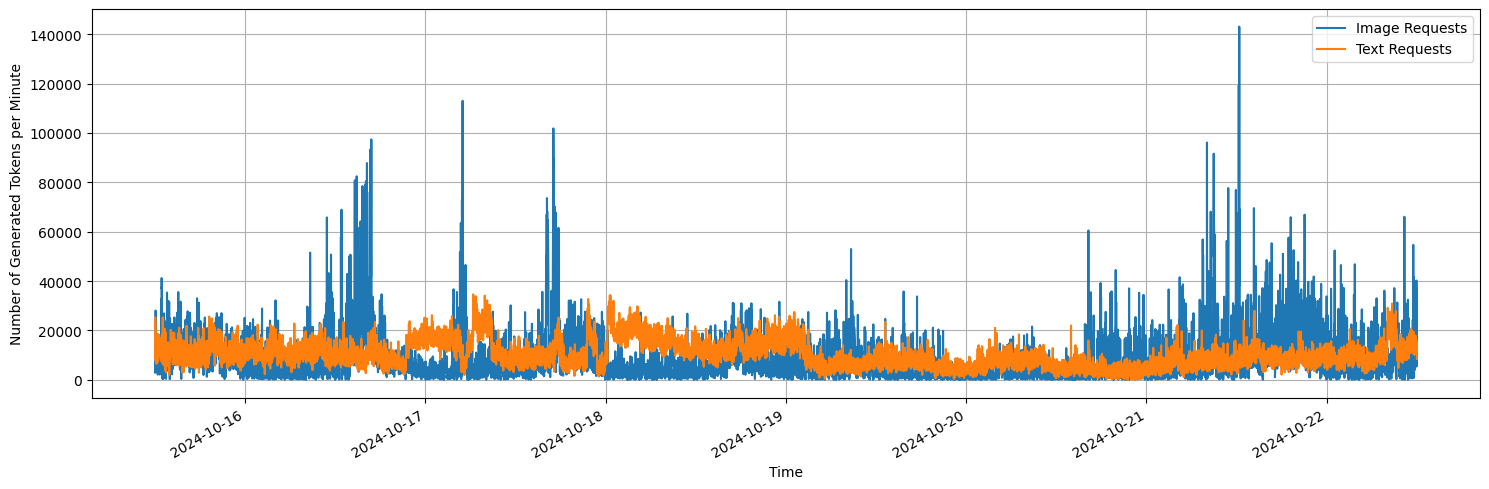

In [14]:
plt_timeseries_time(df_data, field='GeneratedTokens', label="Number of Generated Tokens per Minute")